In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read The dataset

data = pd.read_excel('Concrete_Data.xls')

In [3]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,comp_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Descriptive Statistics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_agg          1030 non-null   float64
 6   fine_agg            1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   comp_strength       1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
blast_furnace_slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
fly_ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarse_agg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fine_agg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
comp_strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


### Univariate Analysis

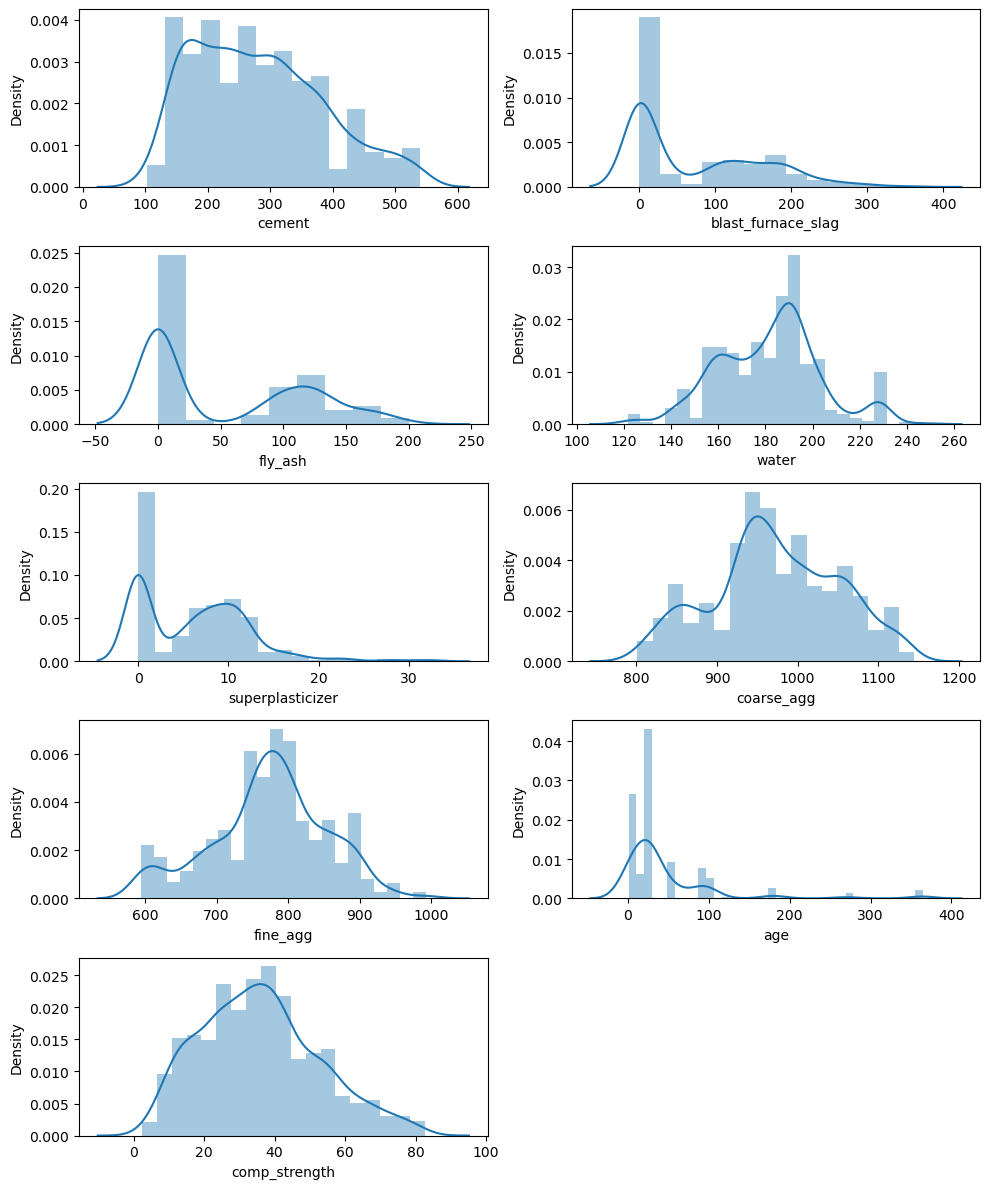

In [6]:
t = 1
plt.figure(figsize=(10,12))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

### Bivariate Analysis

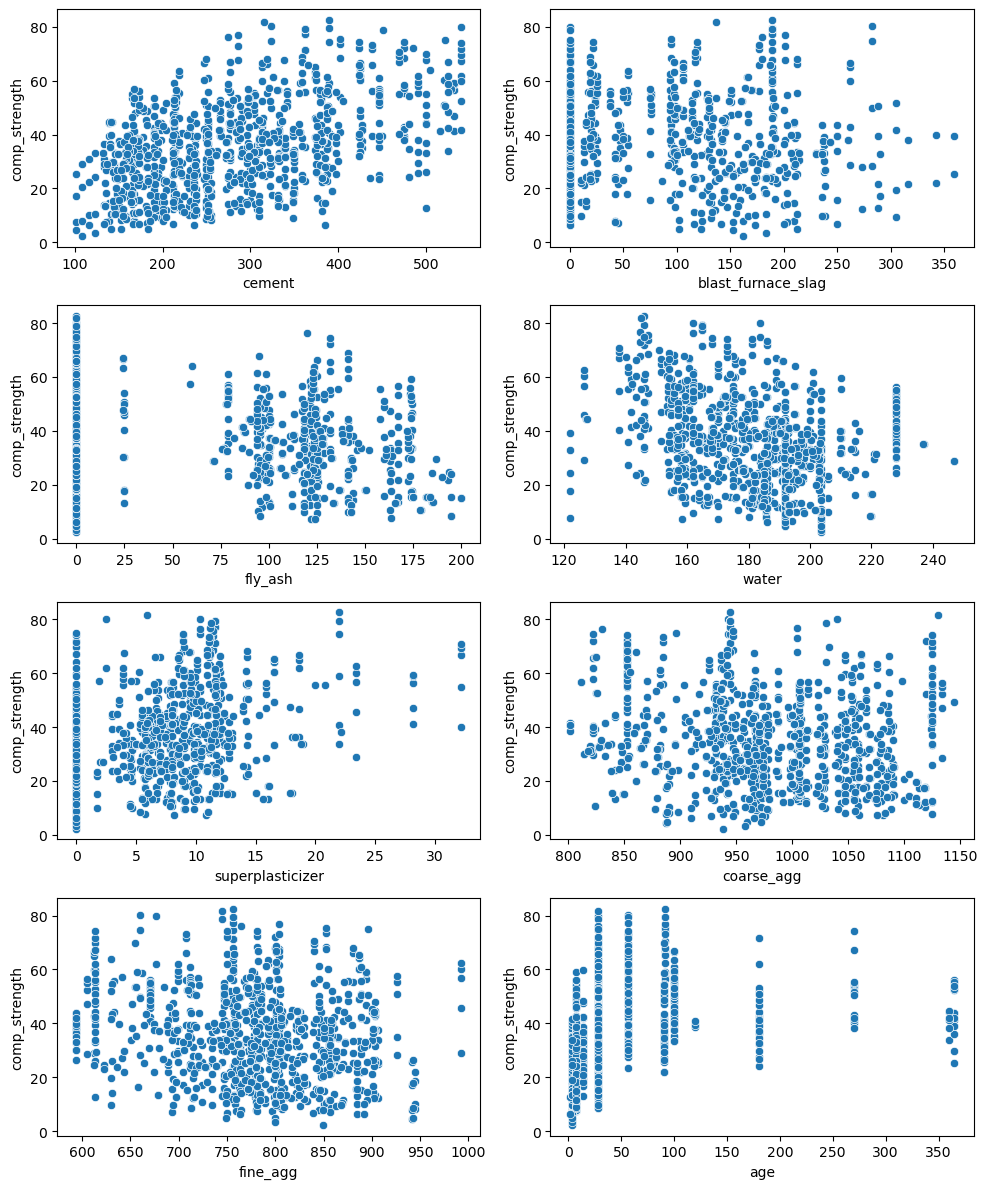

In [7]:
t = 1
plt.figure(figsize=(10,12))
for i in data.columns:
    if i != 'comp_strength':
        plt.subplot(4,2,t)
        sns.scatterplot(x=data[i],y=data['comp_strength'])
        t+=1
plt.tight_layout()
plt.show()

<Axes: >

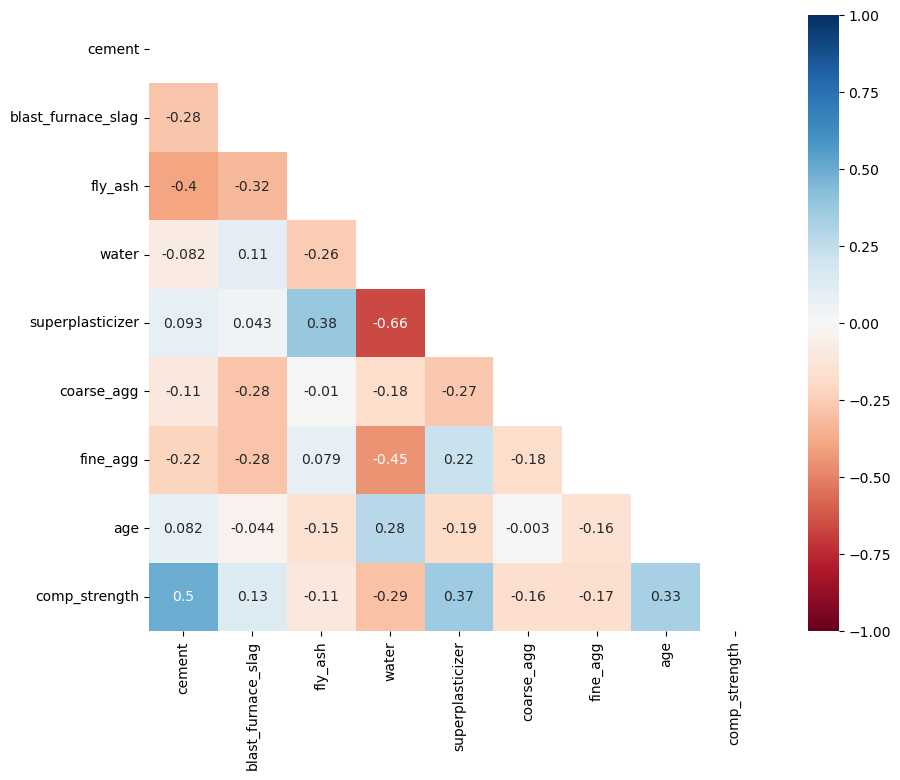

In [8]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True,
           mask = np.triu(data.corr()))

### Treat the defects in the dataset

In [9]:
# Missing Values
data.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_agg            0
fine_agg              0
age                   0
comp_strength         0
dtype: int64

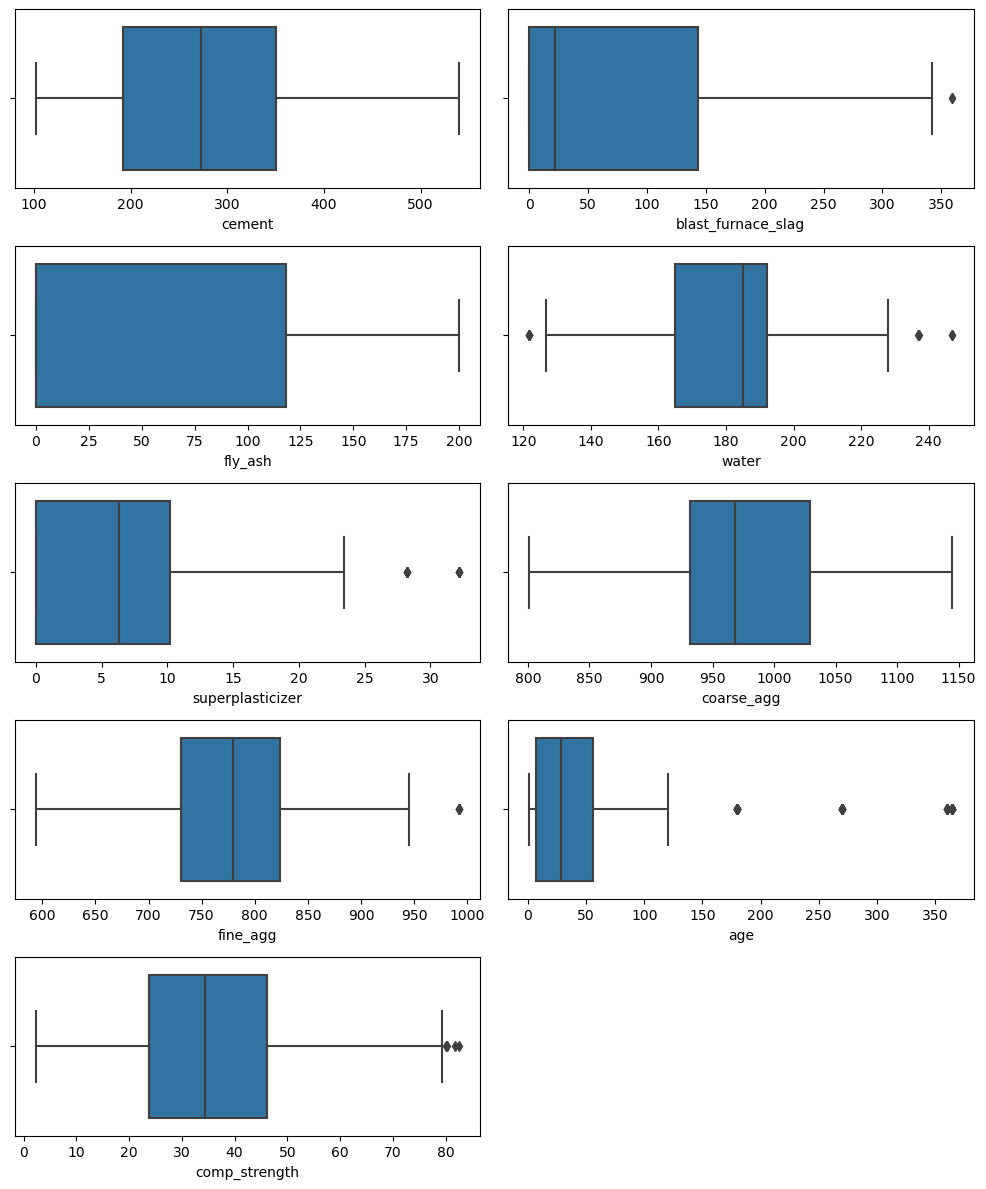

In [10]:
# Do we have Outliers?
t = 1
plt.figure(figsize=(10,12))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

Since we will be training a linear regression model which is highly sensitive to outliers. We will treat the extreme outliers. Just to see the effect of outliers on the model we build and compare two models one with outliers and one without outliers

In [7]:
# First we will the model with outliers present in the dataset
x = data.drop(columns=['comp_strength'])
y = data['comp_strength']

sma.OLS(y,sma.add_constant(x)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comp_strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Mon, 19 Feb 2024   Prob (F-statistic):          6.76e-206
Time:                        12:46:50   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -23.1638     26.588     -0.871      0.384     -75.338      29.010
cement                 0.1198      0.008     14.110      0.000       0.103       0.136
blast_furnace_slag     0.1038      0.010     10.245      0.000       0.084       0.124
fly_ash                0.0879      0.013      6.988      0.000       0.063       0.113
water                 -0.1503      0.040     -3.741      0.000      -0.229      -0.071
superplasticizer       0.2907      0.093      3.110      0.002       0.107       0.474
coarse_agg             0.0180      0.009      1.919      0.055      -0.000       0.036
fine_agg               0.0202      0.011      1.883      0.060      -0.001       0.041
age                    0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.305
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Lets remove the outliers
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr

data = data.loc[~((data>ul)|(data<ll)).any(axis=1)]
data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,comp_strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [9]:
# Model without outliers present in the dataset
x = data.drop(columns=['comp_strength'])
y = data['comp_strength']

sma.OLS(y,sma.add_constant(x)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comp_strength   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     390.0
Date:                Mon, 19 Feb 2024   Prob (F-statistic):          2.92e-291
Time:                        12:46:54   Log-Likelihood:                -3286.5
No. Observations:                 941   AIC:                             6591.
Df Residuals:                     932   BIC:                             6635.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 49.9873     22.409      2.231      0.026       6.010      93.964
cement                 0.1020      0.007     14.655      0.000       0.088       0.116
blast_furnace_slag     0.0755      0.008      8.982      0.000       0.059       0.092
fly_ash                0.0482      0.010      4.667      0.000       0.028       0.068
water                 -0.2496      0.035     -7.161      0.000      -0.318      -0.181
superplasticizer       0.2160      0.085      2.535      0.011       0.049       0.383
coarse_agg            -0.0103      0.008     -1.311      0.190      -0.026       0.005
fine_agg              -0.0103      0.009     -1.152      0.250      -0.028       0.007
age                    0.3127      0.009     34.065      0.000       0.295       0.331
==============================================================================
Omnibus:                        8.746   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.120
Skew:                           0.147   Prob(JB):                      0.00635
Kurtosis:                       3.414   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

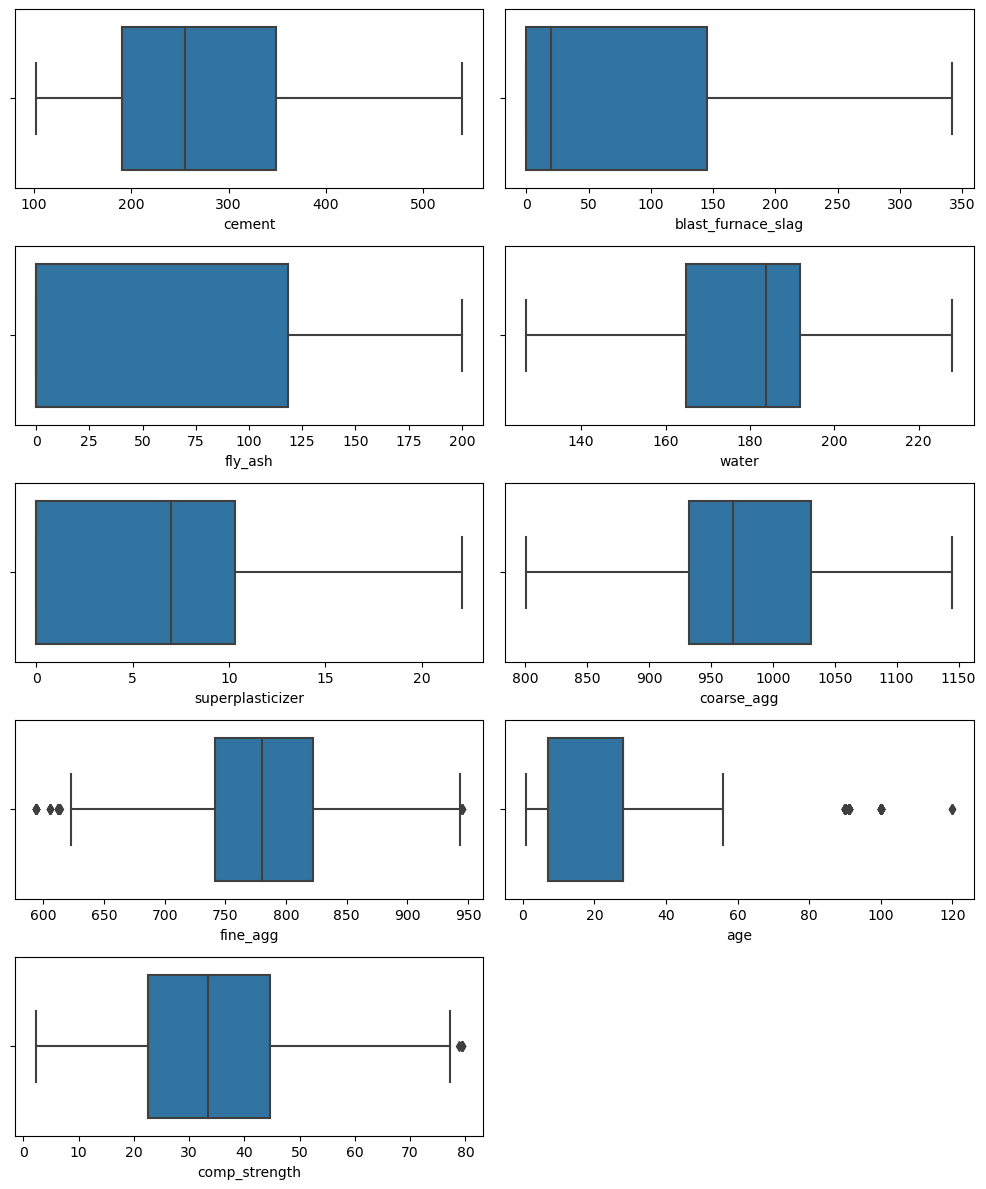

In [14]:
t = 1
plt.figure(figsize=(10,12))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

### Feature Engineering

In [15]:
# Feature Engineering
# Instead of taking water and cement lets take cement to water ratio

x['Cem_Wat_ratio'] = x['cement']/x['water']

x.drop(columns=['cement','water'],inplace=True)

x.head()

,blast_furnace_slag,fly_ash,superplasticizer,coarse_agg,fine_agg,age,Cem_Wat_ratio
1,0.0,0.0,2.5,1055.0,676.0,28,3.333333
5,114.0,0.0,0.0,932.0,670.0,90,1.166667
7,95.0,0.0,0.0,932.0,594.0,28,1.666667
8,114.0,0.0,0.0,932.0,670.0,28,1.166667
9,0.0,0.0,0.0,932.0,594.0,28,2.083333


In [16]:
x['coarse_fine_ratio'] = x['coarse_agg']/x['fine_agg']

x.drop(columns=['coarse_agg','fine_agg'],inplace=True)

x.head()

,blast_furnace_slag,fly_ash,superplasticizer,age,Cem_Wat_ratio,coarse_fine_ratio
1,0.0,0.0,2.5,28,3.333333,1.560651
5,114.0,0.0,0.0,90,1.166667,1.391045
7,95.0,0.0,0.0,28,1.666667,1.569024
8,114.0,0.0,0.0,28,1.166667,1.391045
9,0.0,0.0,0.0,28,2.083333,1.569024


### Building a base model

In [17]:
base_model = sma.OLS(y,sma.add_constant(x)).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comp_strength   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     501.0
Date:                Fri, 09 Feb 2024   Prob (F-statistic):          7.41e-288
Time:                        10:33:36   Log-Likelihood:                -3300.7
No. Observations:                 941   AIC:                             6615.
Df Residuals:                     934   BIC:                             6649.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.8579      2.179     -7.735      0.000     -21.135     -12.581
blast_furnace_slag     0.0795      0.004     19.228      0.000       0.071       0.088
fly_ash                0.0598      0.007      8.896      0.000       0.047       0.073
superplasticizer       0.2923      0.073      3.989      0.000       0.148       0.436
age                    0.3122      0.009     33.621      0.000       0.294       0.330
Cem_Wat_ratio         19.3876      0.611     31.719      0.000      18.188      20.587
coarse_fine_ratio      0.3264      1.558      0.210      0.834      -2.731       3.384
==============================================================================
Omnibus:                        7.729   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.389
Skew:                           0.155   Prob(JB):                       0.0151
Kurtosis:                       3.343   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Before making any Business Interpretations lets check for the assumptions

In [18]:
# Assumption 1: Target Must be numeric: Met

In [19]:
# Assumption 2: There should be no multicoliniarity

# VIF

vif_list = []

for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))
    
pd.DataFrame({'Feature Name':x.columns,'VIF':vif_list}).\
sort_values(by='VIF',ascending=False)

,Feature Name,VIF
5,coarse_fine_ratio,18.748741
4,Cem_Wat_ratio,13.385894
2,superplasticizer,5.190011
1,fly_ash,4.526993
0,blast_furnace_slag,2.973961
3,age,2.246780


In [20]:
# In order to deal with multicolinearity we need to remove columns one by
# one and check the scores of the model

# Model without coarse fine ration : negligible drop

x_c = sma.add_constant(x)

sma.OLS(y,x_c.drop(columns=['coarse_fine_ratio'])).fit().rsquared

0.7629229457193574

In [21]:
# Model without cement water ratio : negligible drop

sma.OLS(y,x_c.drop(columns=['Cem_Wat_ratio'])).fit().rsquared

0.5075700168485489

In [22]:
# Lets drop coarge fine ratio from the model and calculate the VIF again

x.drop(columns=['coarse_fine_ratio'],inplace=True)

vif_list = []

for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))
    
pd.DataFrame({'Feature Name':x.columns,'VIF':vif_list}).\
sort_values(by='VIF',ascending=False)

,Feature Name,VIF
2,superplasticizer,3.933220
4,Cem_Wat_ratio,3.117410
1,fly_ash,2.420682
3,age,2.128090
0,blast_furnace_slag,1.612342


## Model 1

In [23]:
model_1 = sma.OLS(y,sma.add_constant(x)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comp_strength   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     601.8
Date:                Fri, 09 Feb 2024   Prob (F-statistic):          2.94e-289
Time:                        10:33:36   Log-Likelihood:                -3300.7
No. Observations:                 941   AIC:                             6613.
Df Residuals:                     935   BIC:                             6643.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.4837      1.248    -13.209      0.000     -18.933     -14.035
blast_furnace_slag     0.0796      0.004     19.587      0.000       0.072       0.088
fly_ash                0.0601      0.007      9.052      0.000       0.047       0.073
superplasticizer       0.2879      0.070      4.102      0.000       0.150       0.426
age                    0.3122      0.009     33.639      0.000       0.294       0.330
Cem_Wat_ratio         19.4152      0.597     32.540      0.000      18.244      20.586
==============================================================================
Omnibus:                        7.756   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.407
Skew:                           0.156   Prob(JB):                       0.0149
Kurtosis:                       3.342   Cond. No.                         619.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

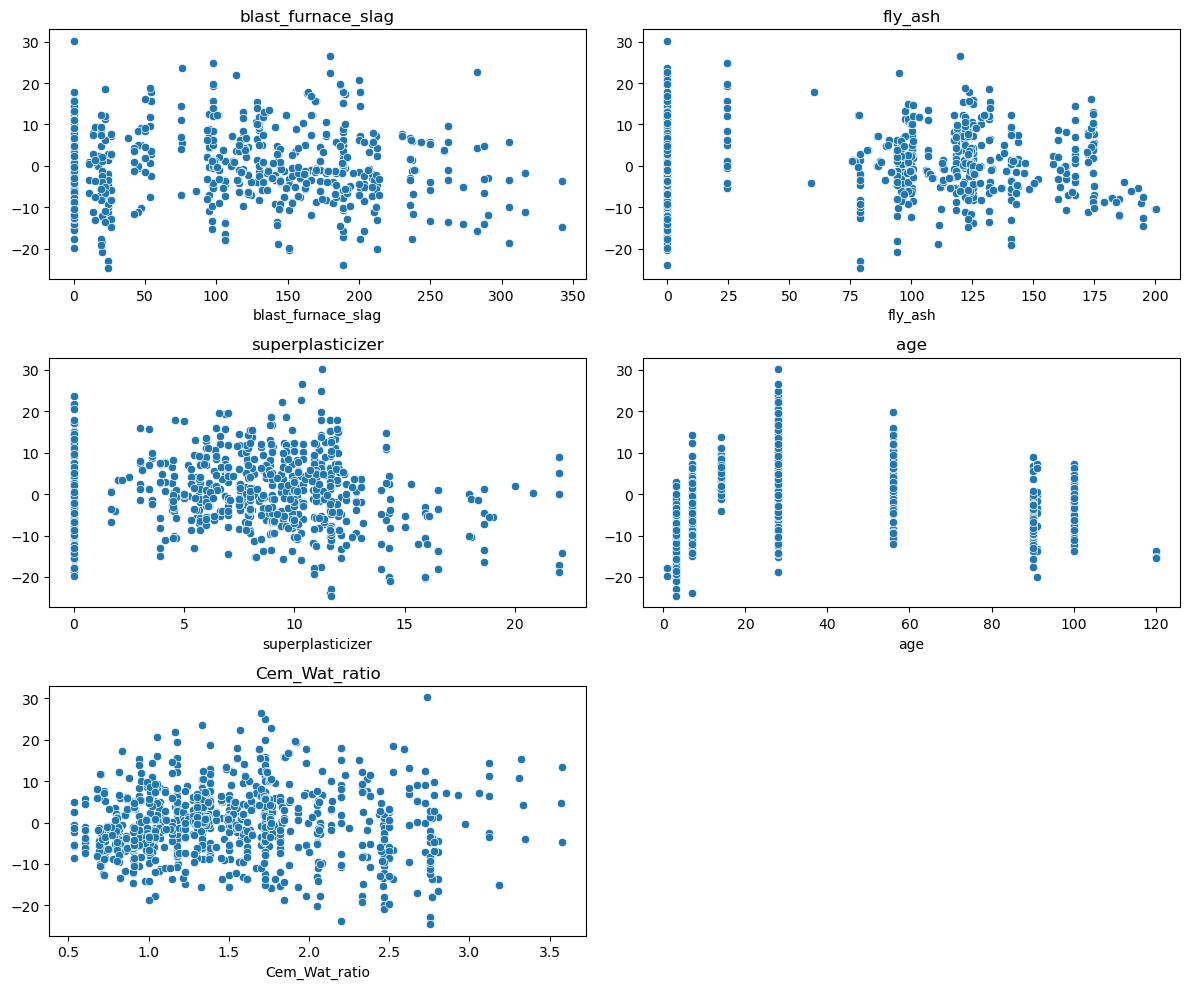

In [24]:
# Assumption 3 : Linear relation among variables

# Plot residual vs ind variabled

plt.figure(figsize=(12,10))

t = 1
for i in x.columns:
    plt.subplot(3,2,t)
    sns.scatterplot(x=x[i],y=model_1.resid)
    
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

# they must be randomly scattered 

In [25]:
from statsmodels.stats.diagnostic import linear_rainbow

In [26]:
# Rainbow test to check the linearity

# H0: variables are linear
# H1: variables are not linear

p_value = linear_rainbow(model_1)[1]
if p_value < .05:
    print('Reject H0: variables are not linear ')
else:
    print('Fail to Reject H0: variables are linear')

Fail to Reject H0: variables are linear


In [27]:
# assumption 4: There should be np autocorrelation 

# d = 1.2171

Since durbin Watson statistic is less than 1.5 < d < 2.5. We can say that there is a positive autocrrelation in the dataset

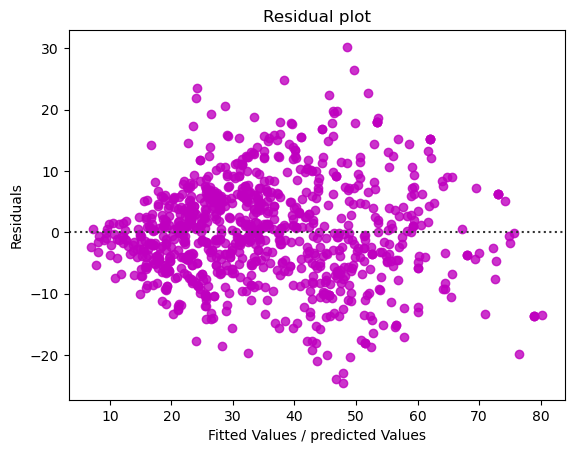

In [28]:
# assumption 5 : The residuals must be homoscedastic

sns.residplot(x=model_1.fittedvalues,y=model_1.resid,color='m')
plt.xlabel('Fitted Values / predicted Values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

In [29]:
# breusch pagan tes

# H0: the vareiance are same: homoscedastic
# H1: the variances are mot same: hetroscedastic


p_balue = sma.stats.diagnostic.het_breuschpagan(model_1.resid,model_1.model.exog)[1]
print(p_balue)
if p_balue < .05:
    print('Reject Ho')    
else:
    print('Fail to reject Ho')

1.6514582654401733e-20
Reject Ho


In [30]:
# assumption 6 : Residuals must be normal

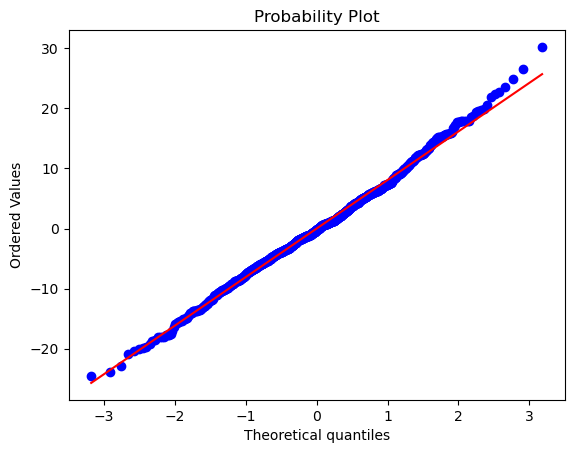

In [31]:
# QQ plot
stats.probplot(model_1.resid,plot=plt)
plt.show()

In [32]:
# this red line means that the residaul is noramlly distriuted 
# this blue line shows the actual distribution of the data(RESIDUALS)

In [33]:
# the residuals are approximate normal

In [34]:
# # if it is greater than 5000 ten use jarque bera

# p_value = stats.jarque_bera(model_1.resid)[1]
# if p_value < .05:
#     print('Reject H0')
# else:
#     print("Fail to reject Ho")

## Business Interpretation

In [35]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comp_strength   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     601.8
Date:                Fri, 09 Feb 2024   Prob (F-statistic):          2.94e-289
Time:                        10:33:38   Log-Likelihood:                -3300.7
No. Observations:                 941   AIC:                             6613.
Df Residuals:                     935   BIC:                             6643.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.4837      1.248    -13.209      0.000     -18.933     -14.035
blast_furnace_slag     0.0796      0.004     19.587      0.000       0.072       0.088
fly_ash                0.0601      0.007      9.052      0.000       0.047       0.073
superplasticizer       0.2879      0.070      4.102      0.000       0.150       0.426
age                    0.3122      0.009     33.639      0.000       0.294       0.330
Cem_Wat_ratio         19.4152      0.597     32.540      0.000      18.244      20.586
==============================================================================
Omnibus:                        7.756   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.407
Skew:                           0.156   Prob(JB):                       0.0149
Kurtosis:                       3.342   Cond. No.                         619.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* All the features are significant features
* The intercept being negative (-16.4837) is asburd beacause with no composition, negatie compressive strength makes no sense
* One unit increae in cement_water_ration increases the strength by 19 Mpa 
* If the concrete ags by 1 day there is increase in strength by 0.312
* Adding a superplastizer by 1 unit there is increase in strength by 0.2789

# Predictive Modeling

In [36]:
# fitted model
# refit model on train dataset

# lets split the data into train and test


model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comp_strength   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     601.8
Date:                Fri, 09 Feb 2024   Prob (F-statistic):          2.94e-289
Time:                        10:33:38   Log-Likelihood:                -3300.7
No. Observations:                 941   AIC:                             6613.
Df Residuals:                     935   BIC:                             6643.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.4837      1.248    -13.209      0.000     -18.933     -14.035
blast_furnace_slag     0.0796      0.004     19.587      0.000       0.072       0.088
fly_ash                0.0601      0.007      9.052      0.000       0.047       0.073
superplasticizer       0.2879      0.070      4.102      0.000       0.150       0.426
age                    0.3122      0.009     33.639      0.000       0.294       0.330
Cem_Wat_ratio         19.4152      0.597     32.540      0.000      18.244      20.586
==============================================================================
Omnibus:                        7.756   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.407
Skew:                           0.156   Prob(JB):                       0.0149
Kurtosis:                       3.342   Cond. No.                         619.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# we have to first import these libraries

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error


In [38]:
# this order has to be same
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.70,random_state=1)

In [39]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(658, 5) (283, 5) (658,) (283,)


In [40]:
# model_2 = sma.OLS(y_train,x_train).fit()

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model_lr = LinearRegression()

In [43]:
model_lr.fit(x_train,y_train) # training a model

LinearRegression()

In [44]:
y_pred = model_lr.predict(x_test) # this is unseen data 

In [45]:
print('R-Sqaure:', r2_score(y_test,y_pred)) # test ka rsquare h ye ('original answer is y_test and predicted answer is y_pred')
# main actual asnwer ko predicted asnwer se compare kar raha  hu
# it only need yi and yi_hat id doesnt need x 

R-Sqaure: 0.7576581307991499


In [49]:
print('Test Data')

r2 = r2_score(y_test,y_pred)
n = len(y_test)
k = x_test.shape[1]


print('Adjusted r-Square', 1 - ((1 -r2)*(n-1))/(n-k-1))

print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))

Test Data
Adjusted r-Square 0.7532837288280154
MSE: 64.39266071824991
RMSE: 8.02450376772607
MAE: 6.175142548891706
MAPE: 0.2459749078490159


In [ ]:
## ML Pipeline

Step 1 : Data preprocessing
1. Collection of data
2. Formatting the data
3. Labelling the data

Step2: Feature Extraction
1. Feature Transformation (trasformation techn)
2. Feature Engineering
3. Feature Selection (select specific features which you want to include)

Step3: Modelling
1. Build a model
2. Evaluate the model

Step4: Optimization
1. Prediction Evaluation
2. Model Validation 
3. Model Fine Tuning 

Step5: Deployment

# DEPLOYMENT

In [67]:
import pickle

In [72]:
with open('Lr_model.pkl','wb') as file:
    pickle.dump(model_lr,file)

In [71]:
model_lr.feature_names_in_

array(['blast_furnace_slag', 'fly_ash', 'superplasticizer', 'age',
       'Cem_Wat_ratio'], dtype=object)

In [48]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comp_strength   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     601.8
Date:                Fri, 09 Feb 2024   Prob (F-statistic):          2.94e-289
Time:                        10:34:24   Log-Likelihood:                -3300.7
No. Observations:                 941   AIC:                             6613.
Df Residuals:                     935   BIC:                             6643.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.4837      1.248    -13.209      0.000     -18.933     -14.035
blast_furnace_slag     0.0796      0.004     19.587      0.000       0.072       0.088
fly_ash                0.0601      0.007      9.052      0.000       0.047       0.073
superplasticizer       0.2879      0.070      4.102      0.000       0.150       0.426
age                    0.3122      0.009     33.639      0.000       0.294       0.330
Cem_Wat_ratio         19.4152      0.597     32.540      0.000      18.244      20.586
==============================================================================
Omnibus:                        7.756   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.407
Skew:                           0.156   Prob(JB):                       0.0149
Kurtosis:                       3.342   Cond. No.                         619.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
print('Train Data')

# jo padhae question usi mein se paper mein bhi vo hi question aa gaye
# jis data pe train kara model ko us hi data set ko(x_train dataset) ko leke predict kar diya

y_pred = model_lr.predict(x_train)


r2 = r2_score(y_train,y_pred)
n = len(y_train)
k = x_train.shape[1]


print('Adjusted r-Square', 1 - ((1 -r2)*(n-1))/(n-k-1))

print('MSE:',mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train,y_pred)))
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred))

Train Data
Adjusted r-Square 0.7620221899313593
MSE: 65.84229224938893
RMSE: 8.114326358323835
MAE: 6.368805904638597
MAPE: 0.22705805066933893
